In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

# Importing the Data Set
df_adult_eda = pd.read_csv("/content/sample_data/adult.csv")
df_adult_eda.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [2]:
df_adult_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
# Removing any space in the names of the columns
df_adult_eda.columns = df_adult_eda.columns.str.replace(' ', '')
df_adult_eda.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [4]:
df_adult_eda['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [5]:
print(df_adult_eda.shape)

# Dropping the duplicate Rows
df_adult_eda = df_adult_eda.drop_duplicates(keep = 'first')
df_adult_eda.shape

(32561, 15)


(32537, 15)

In [6]:
df_adult_eda.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df_adult_eda['age'].nunique()

73

In [8]:
df_adult_eda['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
# Checking the null values in the columns
df_adult_eda.isnull().sum(axis = 0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
df_adult_eda[df_adult_eda['native.country'] == '?'].shape

(582, 15)

In [11]:
# This Code will Count the occuring of the '?' in all the columns
for i in df_adult_eda.columns:
    t = df_adult_eda[i].value_counts()
    index = list(t.index)
    print ("The Value Counts of ? in", i)
    for i in index:
        temp = 0
        if i == '?':
            print (t['?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

The Value Counts of ? in age
0
The Value Counts of ? in workclass
1836
The Value Counts of ? in fnlwgt
0
The Value Counts of ? in education
0
The Value Counts of ? in education.num
0
The Value Counts of ? in marital.status
0
The Value Counts of ? in occupation
1843
The Value Counts of ? in relationship
0
The Value Counts of ? in race
0
The Value Counts of ? in sex
0
The Value Counts of ? in capital.gain
0
The Value Counts of ? in capital.loss
0
The Value Counts of ? in hours.per.week
0
The Value Counts of ? in native.country
582
The Value Counts of ? in income
0


In [12]:
# Dropping the rows whose occupation is '?' 
df_adult_eda = df_adult_eda[df_adult_eda.occupation != '?']

df_adult_eda['occupation'].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
# The minimum age of the person
df_adult_eda.at[df_adult_eda['age'].idxmin(),'age']

17

Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The maximum age is 90
The minimum age is 17


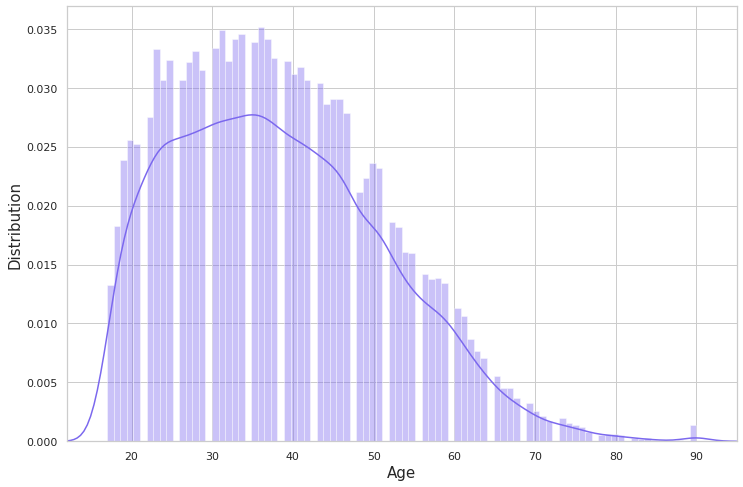

In [14]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df_adult_eda['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df_adult_eda['age'].max())
print ("The minimum age is", df_adult_eda['age'].min())

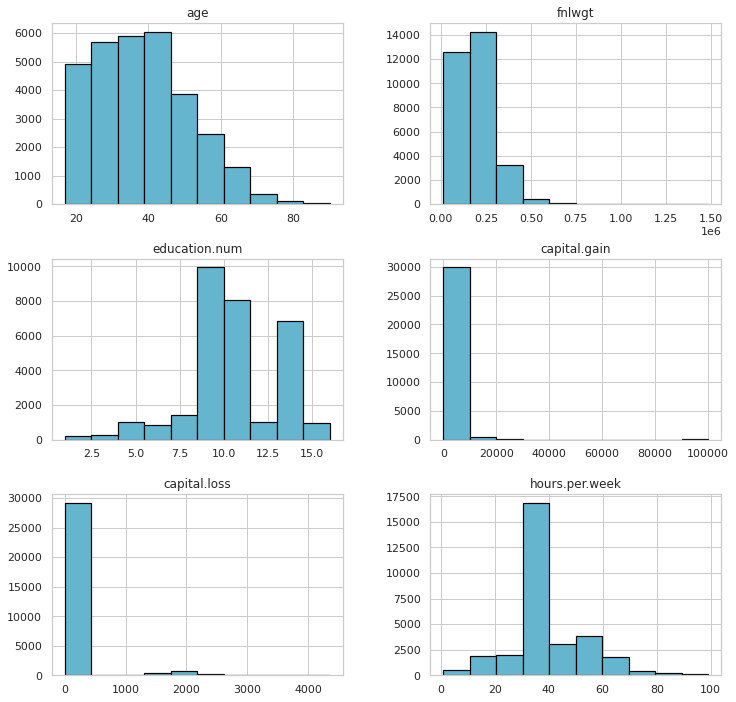

In [15]:
# Distribution of Different Features of the Dataset
distribution = df_adult_eda.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [16]:
# Checking the Difference between the values of the mean and median to get an idea about the amount of outliers
print (df_adult_eda['hours.per.week'].median())
print (df_adult_eda['hours.per.week'].mean())

40.0
40.95275949697009


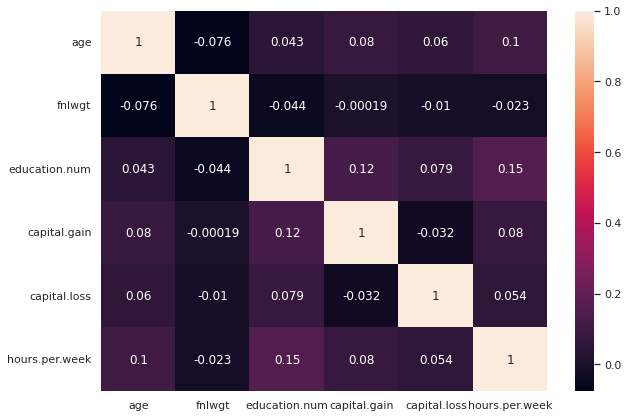

In [17]:
# This heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df_adult_eda.corr(), annot = True);

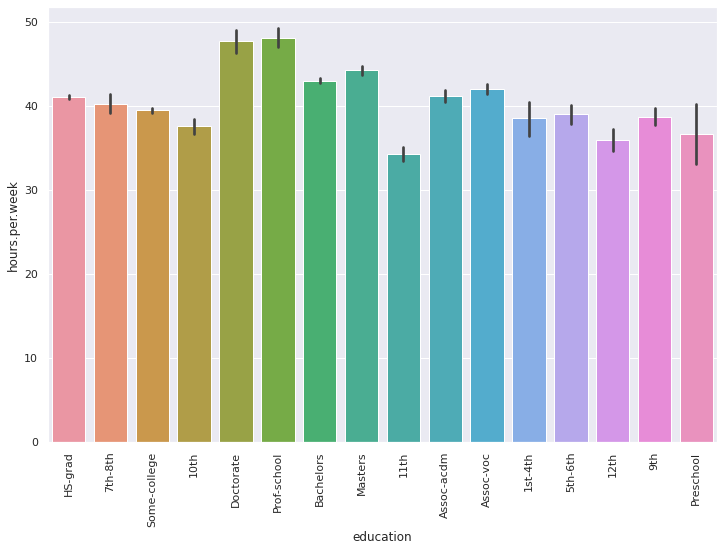

In [18]:
# This shows the hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df_adult_eda['education'], y = df_adult_eda['hours.per.week'], data = df_adult_eda)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

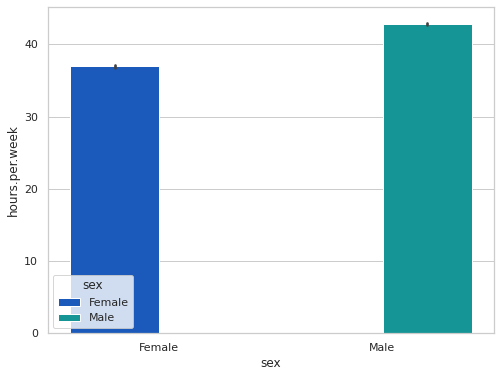

In [19]:
# This bar graph shows the difference of hours per week between male and female 
sns.set(style = 'whitegrid', rc={'figure.figsize':(8,6)})
sns.barplot(x = df_adult_eda['sex'], y = df_adult_eda['hours.per.week'], data = df_adult_eda,
            estimator = mean, hue = 'sex', palette = 'winter');

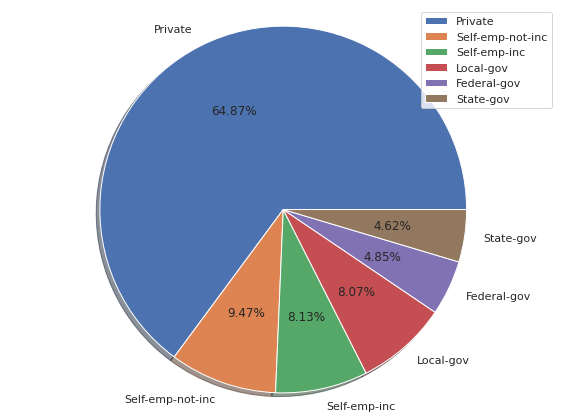

In [20]:
# Creating Pandas Series for the workclasses whose income is higher than 50K 
df_ = df_adult_eda.loc[df_adult_eda['income'] == '>50K',['workclass']]
workclass_types = df_['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

# This Pie chat shows the Percentage of different workclass who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

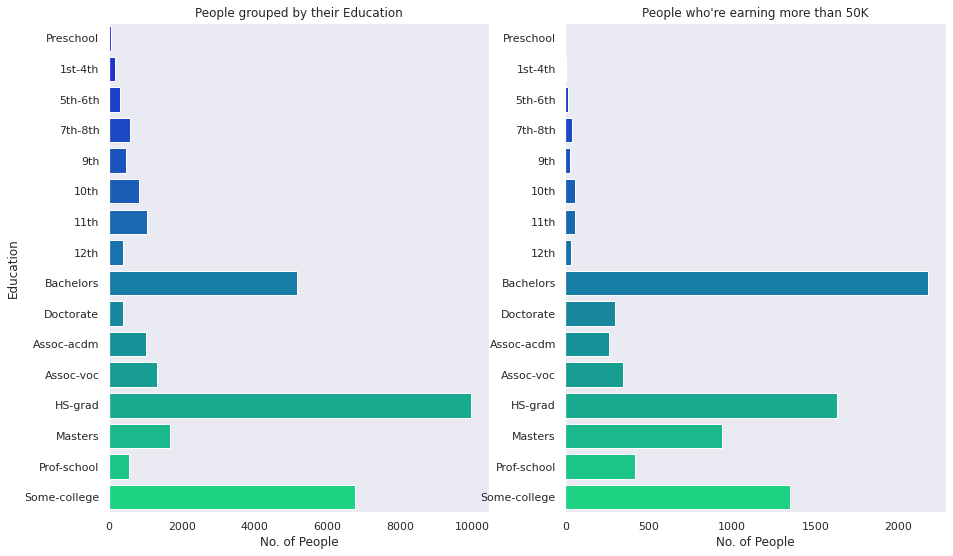

In [21]:
# Grouping people by their education
education_size = df_adult_eda.groupby('education').size()

# Grouping people who earns more than 50K by their education
more_income = df_adult_eda.loc[df_adult_eda['income'] == '>50K', ['education']].groupby('education').size()

sns.set(style = 'dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("Education")
ax[0].set_xlabel("No. of People")
ax[1].set_xlabel("No. of People")
ax[0].title.set_text("People grouped by their Education")
ax[1].title.set_text("People who're earning more than 50K")

# Barplot for the people grouped by their education
sns_ed_1 = sns.barplot(x = list(education_size), y = list(education_size.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[0])

# Barplot for the people who earns more than 50K grouped by their education
sns_ed_2 = sns.barplot(x = list(more_income), y = list(more_income.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[1])

#plt.setp(sns_ed_1.get_xticklabels(), rotation = 90);
#plt.setp(sns_ed_2.get_xticklabels(), rotation = 90);

In [22]:
df_adult_eda.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [23]:
df_adult_eda['occupation'].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [24]:
# Grouping people according to their country and their income
df_adult_eda_ = df_adult_eda[df_adult_eda['native.country'] != '?']
native_more = df_adult_eda_.loc[df_adult_eda_['income'] == '>50K',['native.country']].groupby('native.country').size()
native_less = df_adult_eda_.loc[df_adult_eda_['income'] == '<=50K',['native.country']].groupby('native.country').size()

index_more = list(native_more.index)
index_less = list(native_less.index)

# Checking if the Countries in both aspects are same or not
print(index_more)
print(len(index_more))
print(index_less)
print(len(index_less))

['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
39
['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
41


In [25]:
# Checking which Countries are not in the list
[country for country in index_less if country not in index_more]

['Holand-Netherlands', 'Outlying-US(Guam-USVI-etc)']

In [26]:
# Making DataFrames of the Data
df_more = pd.DataFrame({'Countries' : index_more, '>50K' : list(native_more) })
df_less = pd.DataFrame({'Countries' : index_less, '<=50K' : list(native_less) })

# Adding the entries of the missing countries
df_more.loc[40] = 'Holand-Netherlands', 0
df_more.loc[41] = 'Outlying-US(Guam-USVI-etc)', 0

df_more

,Countries,>50K
0,Cambodia,7
1,Canada,36
2,China,20
3,Columbia,2
4,Cuba,25
5,Dominican-Republic,2
6,Ecuador,4
7,El-Salvador,9
8,England,30
9,France,12


In [27]:
# Merging both the Data Frames to be used for plotting
df_fin = pd.merge(df_less, df_more, on = 'Countries')

df_fin

,Countries,<=50K,>50K
0,Cambodia,11,7
1,Canada,71,36
2,China,48,20
3,Columbia,54,2
4,Cuba,67,25
5,Dominican-Republic,65,2
6,Ecuador,23,4
7,El-Salvador,91,9
8,England,56,30
9,France,15,12


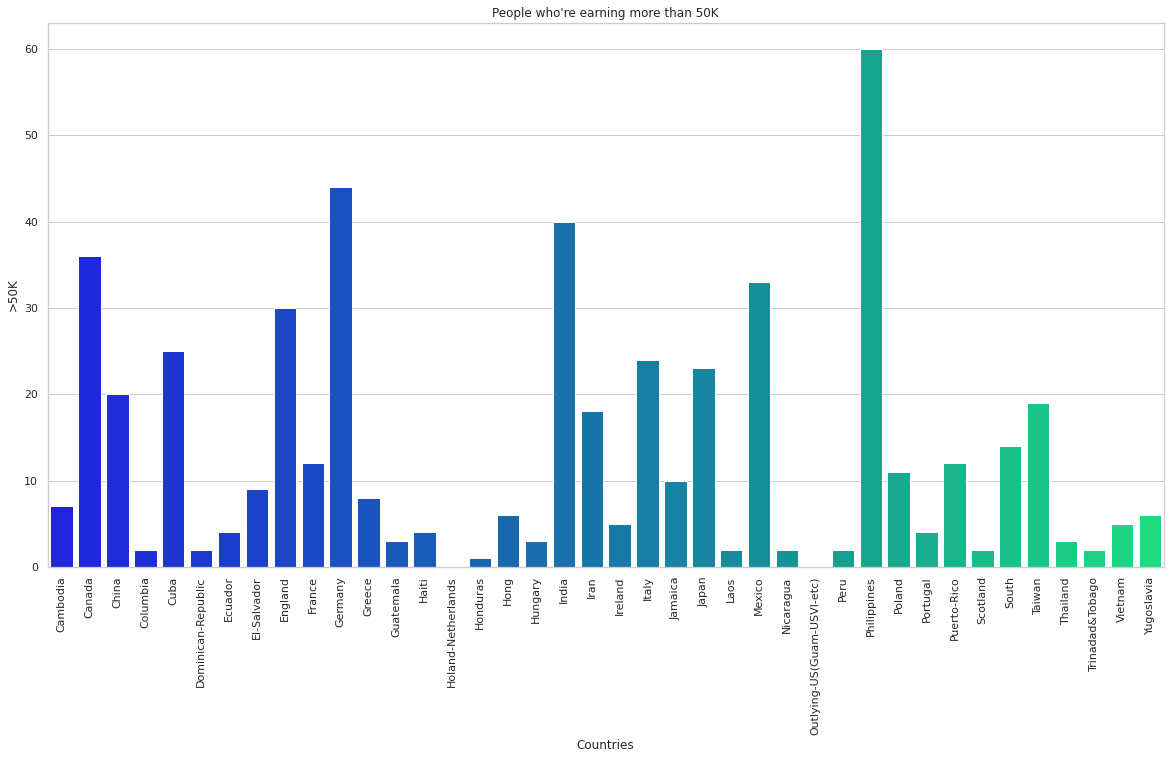

In [28]:
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = [20,10]
# Dropping the United States Row as there's a disparity between US and other Countries
df_fin = df_fin.drop([38])

# This Bar plot shows which country's people after US make more than 50K a year

sns_ = sns.barplot(x = df_fin['Countries'], y = df_fin['>50K'], data = df_fin, palette = 'winter')
sns_.title.set_text("People who're earning more than 50K")

plt.setp(sns_.get_xticklabels(), rotation = 90);

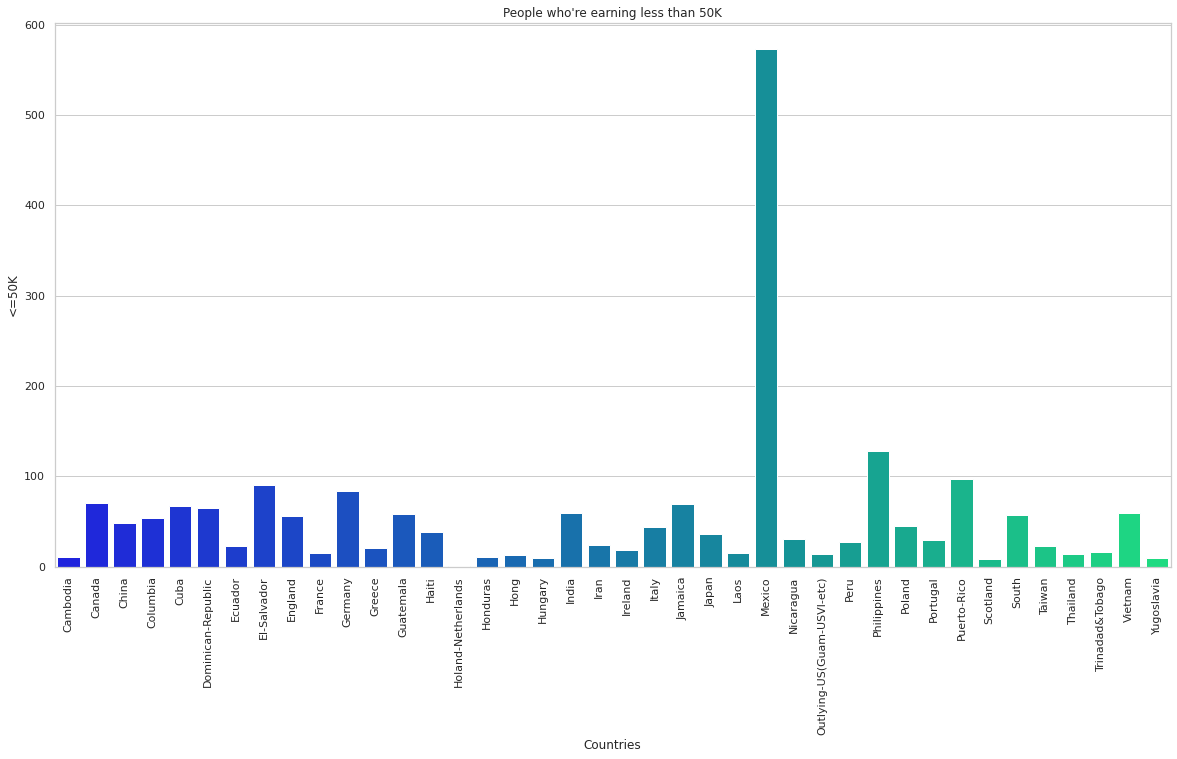

In [29]:
# This Bar plot shows which country's people after US make less than 50K a year

sns__ = sns.barplot(x = df_fin['Countries'], y = df_fin['<=50K'], data = df_fin, palette = 'winter')
sns__.title.set_text("People who're earning less than 50K")

plt.setp(sns__.get_xticklabels(), rotation = 90);

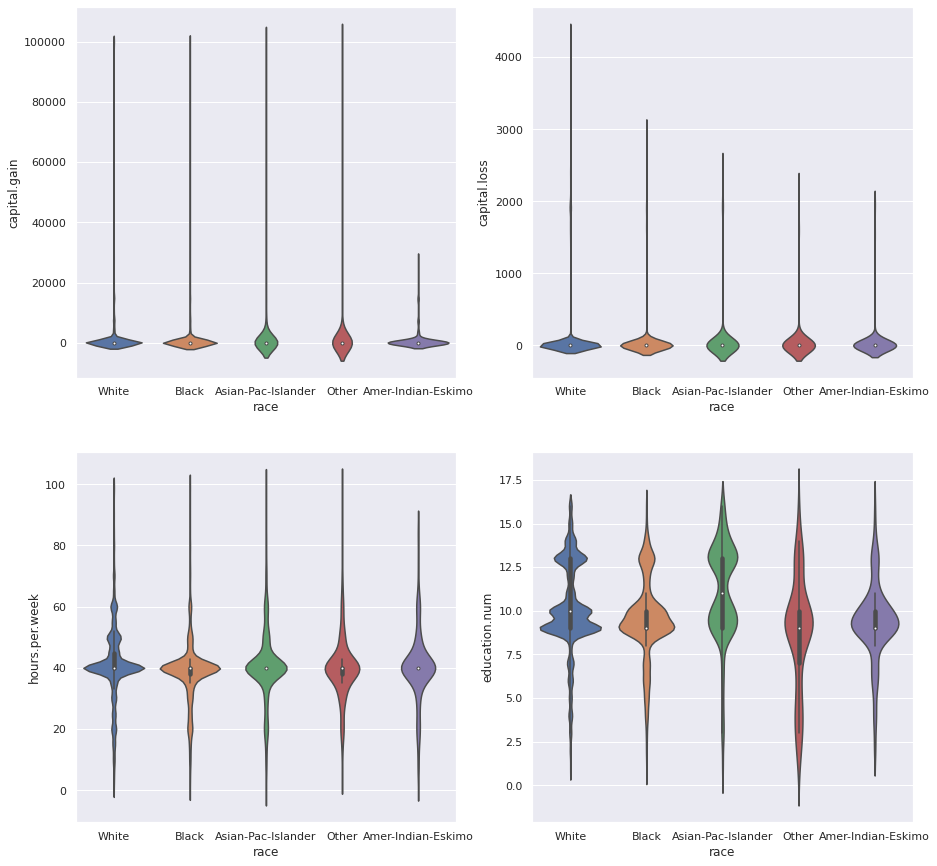

In [30]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')

# This Violin plot show how capital gain, loss, hours per week and education vary with the race of the people
plt.subplot(2,2,1)
sns.violinplot(x = df_adult_eda['race'], y = df_adult_eda['capital.gain'], data = df_adult_eda);
plt.subplot(2,2,2)
sns.violinplot(x = df_adult_eda['race'], y = df_adult_eda['capital.loss'], data = df_adult_eda);
plt.subplot(2,2,3)
sns.violinplot(x = df_adult_eda['race'], y = df_adult_eda['hours.per.week'], data = df_adult_eda);
plt.subplot(2,2,4)
sns.violinplot(x = df_adult_eda['race'], y = df_adult_eda['education.num'], data = df_adult_eda);

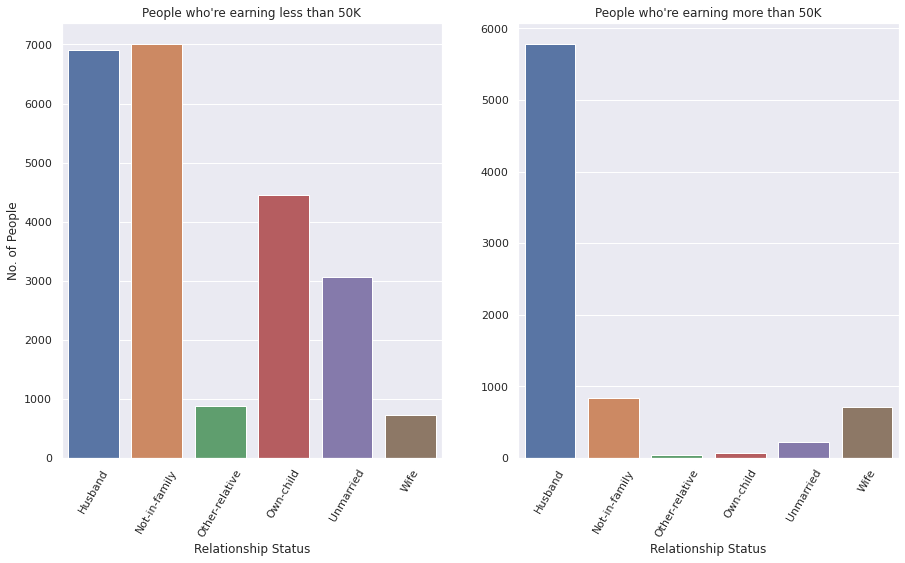

In [31]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [15,8]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("No. of People")
ax[0].set_xlabel("Relationship Status")
ax[1].set_xlabel("Relationship Status")
ax[0].title.set_text("People who're earning less than 50K")
ax[1].title.set_text("People who're earning more than 50K")

# Grouping people according to their Income and Relationship Status 
rel_less = df_adult_eda.loc[df_adult_eda['income'] == '<=50K',['relationship']].groupby('relationship').size()
rel_more = df_adult_eda.loc[df_adult_eda['income'] == '>50K',['relationship']].groupby('relationship').size()

# This barplot shows the No.of people earning more or less than 50K according to their Relationship Status
sns_rel_1 = sns.barplot(x = list(rel_less.index), y = list(rel_less), ax = ax[0])
sns_rel_2= sns.barplot(x = list(rel_more.index), y = list(rel_more), ax = ax[1])

plt.setp(sns_rel_1.get_xticklabels(), rotation = 60);
plt.setp(sns_rel_2.get_xticklabels(), rotation = 60);

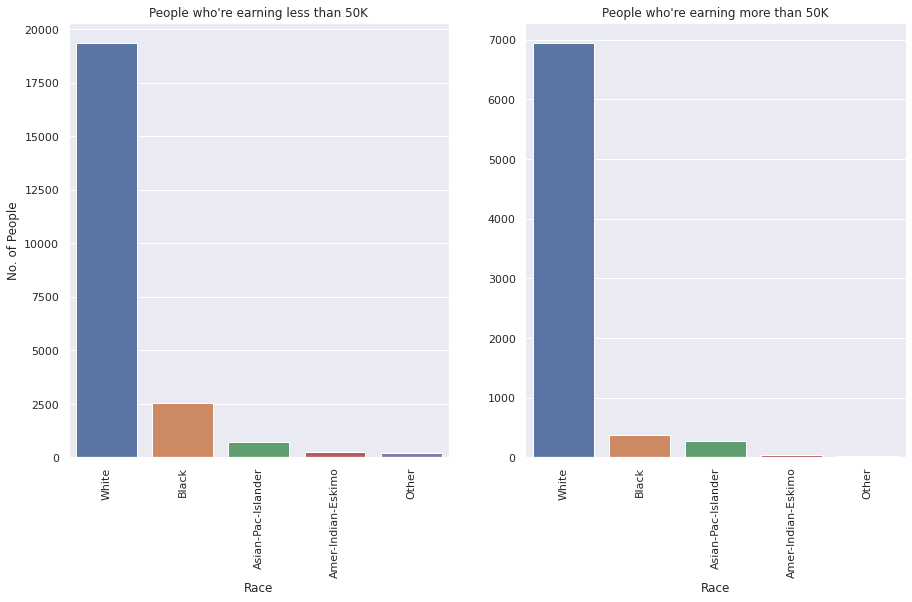

In [32]:
# Setting axes Labels and Titles 
fig, ax = plt.subplots(1,2)
ax[0].set_xlabel('Race')
ax[1].set_xlabel('Race')
ax[0].set_ylabel('No. of People')
ax[0].title.set_text("People who're earning less than 50K")
ax[1].title.set_text("People who're earning more than 50K")

# Grouping People according to their race and income
race_less = df_adult_eda.loc[df_adult_eda['income'] == '<=50K'].groupby('race').size()
race_more = df_adult_eda.loc[df_adult_eda['income'] == '>50K'].groupby('race').size()

# This barplot shows the no.of people earning more or less than 50K according to their races
sns_race_1 = sns.barplot(x = list(race_less.index), y = list(race_less), ax = ax[0],
                         order = ['White', 'Black','Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'])
sns_race_2 = sns.barplot(x = list(race_more.index), y = list(race_more), ax = ax[1],
                        order = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'])

plt.setp(sns_race_1.get_xticklabels(), rotation = 90);
plt.setp(sns_race_2.get_xticklabels(), rotation = 90);

Preprocessing

In [33]:
# Copying the eda adult dataFrame and reseting the index
df_adult = df_adult_eda.copy()

df_adult = df_adult.reset_index(drop = True)
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [34]:
df_adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30694.000000,3.069400e+04,30694.000000,30694.000000,30694.000000,30694.000000
mean,38.447612,1.898482e+05,10.131557,1106.901903,88.979735,40.952759
std,13.115154,1.054651e+05,2.561280,7500.730406,405.808149,11.984367
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785135e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.372938e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [35]:
# Removing the unkown occupations
df_adult = df_adult[df_adult.occupation != '?']

print (df_adult['occupation'].value_counts())

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64


In [36]:
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [37]:
# Changing the income column into Numerical Value
df_adult['income'] = df_adult['income'].map({'<=50K':0, '>50K':1})

In [38]:
df_adult['income'].value_counts()

0    23046
1     7648
Name: income, dtype: int64

In [39]:
# Changing the Categorical Values to Numerical values using the Label Encoder
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df_adult.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df_adult[feature] = label_encoder_feat[feature].fit_transform(df_adult[feature])

df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,2,132870,11,9,6,3,1,4,0,0,4356,18,39,0
1,54,2,140359,5,4,0,6,4,4,0,0,3900,40,39,0
2,41,2,264663,15,10,5,9,3,4,0,0,3900,40,39,0
3,34,2,216864,11,9,0,7,4,4,0,0,3770,45,39,0
4,38,2,150601,0,6,5,0,4,4,1,0,3770,40,39,0


## Separating features and label:

In [40]:
# Shuffling the Data Set
from sklearn.utils import shuffle
df_adult = shuffle(df_adult)

# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split

features_ = df_adult.drop(columns = ['income', 'education.num'])
X=features_
target = df_adult['income']
y=target

### Balancing the target variable using oversampling:

In [41]:
y.value_counts()

0    23046
1     7648
Name: income, dtype: int64

In [42]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [43]:
# Checking the value counts again
y.value_counts()

0    23046
1    23046
Name: income, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


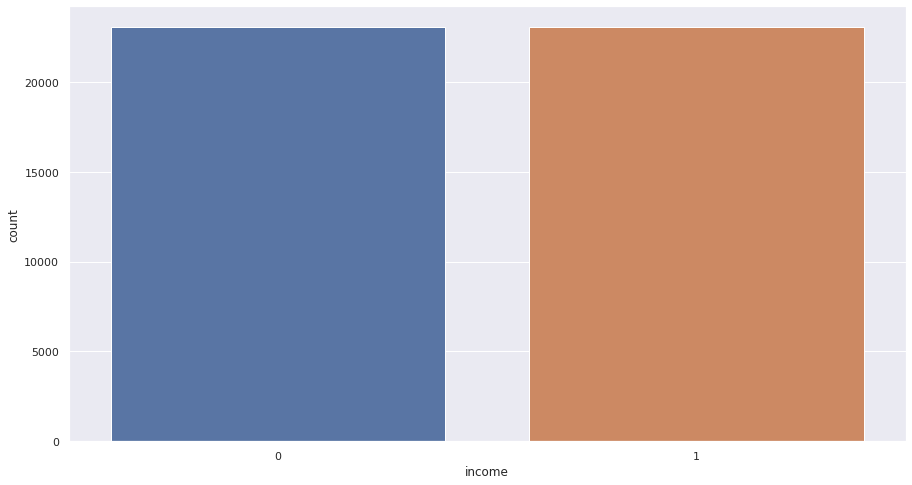

In [44]:
# Visualizing the data after oversampling
sns.countplot(y)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (32264, 13)
Test data set size :  (13828, 13)


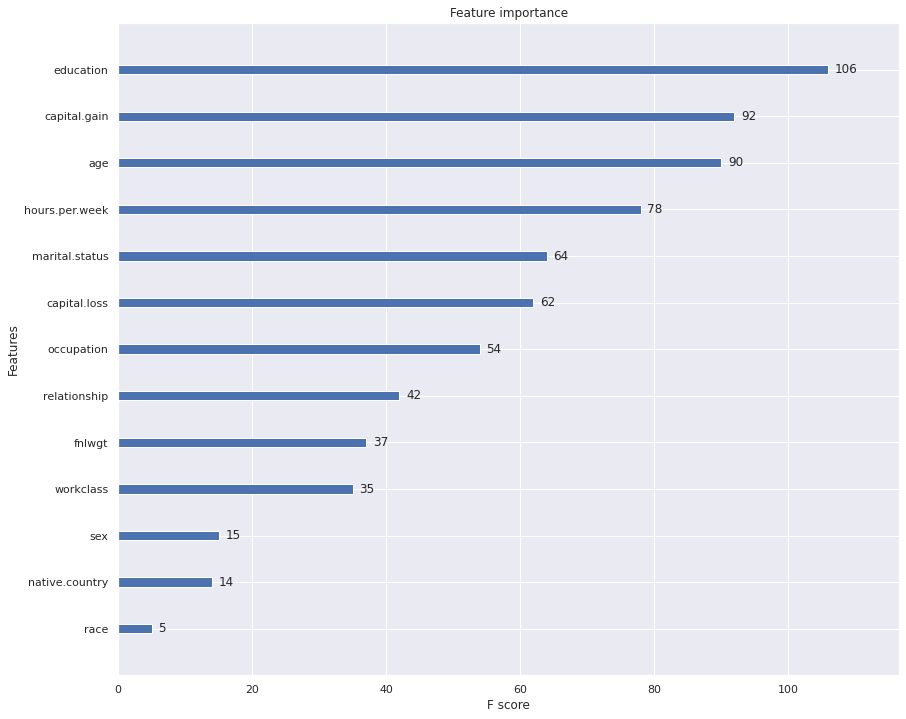

In [46]:
# Plotting the feature importances using the Boosted Gradient Descent
from xgboost import XGBClassifier
from xgboost import plot_importance

# Training the model
model = XGBClassifier()
model_importance = model.fit(X_train, y_train)

# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance);

Modelling

In [47]:
# Importing the required libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [48]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

## Analysis of the model performances

Classification Reports

In [49]:
ACC=[]
CV_ACC=[]

In [50]:
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    pred= m.predict(X_test)

    Acc=accuracy_score(y_test,pred)*100
    
    print('Accuracy_Score of ',m, 'is', Acc)
    print("F1 SCore", f1_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)
    ACC.append(Acc)

Accuracy_Score of  LogisticRegression() is 63.30633497251953
F1 SCore 63.76749500142815
Confusion Matrix of  LogisticRegression()  is 
 [[4289 2622]
 [2452 4465]]
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      6911
           1       0.63      0.65      0.64      6917

    accuracy                           0.63     13828
   macro avg       0.63      0.63      0.63     13828
weighted avg       0.63      0.63      0.63     13828

**************************************************
Accuracy_Score of  RidgeClassifier() is 73.78507376337865
F1 SCore 76.02988824968591
Confusion Matrix of  RidgeClassifier()  is 
 [[4454 2457]
 [1168 5749]]
              precision    recall  f1-score   support

           0       0.79      0.64      0.71      6911
           1       0.70      0.83      0.76      6917

    accuracy                           0.74     13828
   macro avg       0.75      0.74      0.74     13828
weighted avg       0.75      0

In [51]:
ACC

[63.30633497251953,
 73.78507376337865,
 83.38877639571884,
 59.93636100665317,
 71.16719699161122,
 88.4582007520972,
 87.11310384726642,
 62.87243274515476,
 86.78767717674283,
 86.07173850159097,
 87.19988429273937]

## Cross Validation Score:

In [52]:
for i in model:
    pred= i.predict(X_test)
    Acc=accuracy_score(y_test,pred)*100
    print('Accuracy_Score of ',i, 'is', Acc)
    cross=cross_val_score(i,X,y,cv=5, scoring='accuracy').mean()*100
    print("cross Validation accuracy score of ",i ," is ",cross)
    print('*'*50)
    CV_ACC.append(cross)

Accuracy_Score of  LogisticRegression() is 63.30633497251953
cross Validation accuracy score of  LogisticRegression()  is  64.02625738429066
**************************************************
Accuracy_Score of  RidgeClassifier() is 73.78507376337865
cross Validation accuracy score of  RidgeClassifier()  is  73.74172586066618
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 83.38877639571884
cross Validation accuracy score of  DecisionTreeClassifier()  is  83.38130584927113
**************************************************
Accuracy_Score of  SVC() is 59.93636100665317
cross Validation accuracy score of  SVC()  is  59.31832367385071
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 71.16719699161122
cross Validation accuracy score of  KNeighborsClassifier()  is  71.93443498057478
**************************************************
Accuracy_Score of  RandomForestClassifier() is 88.4582007520972


In [62]:
Table = pd.DataFrame({'Model':[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model],
                     'Acc_Score': ACC,
                     'CV_Acc_Score':CV_ACC})

Table.sort_values('Acc_Score', ascending = False)

,Model,Acc_Score,CV_Acc_Score
5,"(DecisionTreeClassifier(max_features='auto', r...",88.458201,87.844146
10,([DecisionTreeRegressor(criterion='friedman_ms...,87.199884,86.036835
6,XGBClassifier(),87.113104,85.939195
8,(DecisionTreeClassifier(random_state=471625313...,86.787677,86.234348
9,"(DecisionTreeClassifier(max_depth=1, random_st...",86.071739,85.045318
2,DecisionTreeClassifier(),83.388776,83.381306
1,RidgeClassifier(),73.785074,73.741726
4,KNeighborsClassifier(),71.167197,71.934435
0,LogisticRegression(),63.306335,64.026257
7,SGDClassifier(),62.872433,52.260549


## Hyper Parameter tuning:

In [55]:
n_estimator= [200, 400, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt','log2']  # mini no of features to create Decission Tree
max_depth=[10, 64, 118, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # mini no of sample rerquired to split node
min_samples_leaf= [1,3,4,6,7,9]  #mini no of sample required at each leaf node

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 400, 600, 800, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 64, 118, 173, 227, 282, 336],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4, 6, 7, 9]}

In [56]:
random= RandomizedSearchCV(RFR_model,param_distributions=param_grid,cv=5,n_jobs=-1)
random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 6, 7, 9],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]})

In [58]:
random.best_estimator_

RandomForestClassifier(max_depth=227, max_features='log2', min_samples_leaf=3,
                       n_estimators=200)

In [59]:
random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 227}

In [60]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test,pred) * 100, 2))
print('F1 score:', round(f1_score(y_test,pred) * 100, 2))

Random Forest Classifier:
Accuracy score: 87.2
F1 score: 87.5


In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[5861, 1050],
       [ 720, 6197]])

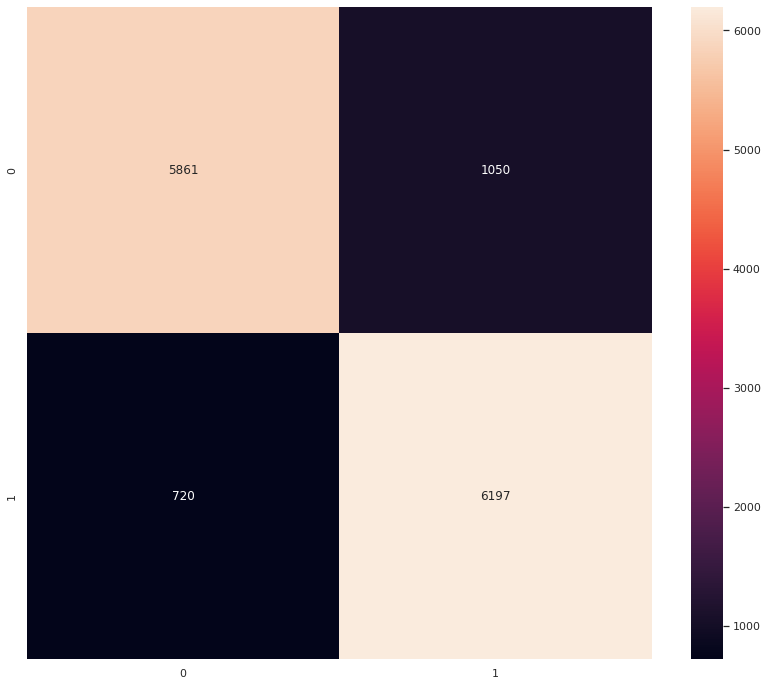

In [64]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      6911
           1       0.86      0.90      0.88      6917

    accuracy                           0.87     13828
   macro avg       0.87      0.87      0.87     13828
weighted avg       0.87      0.87      0.87     13828



In [66]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

Text(0.5, 1.0, 'ROC AUC Plot')

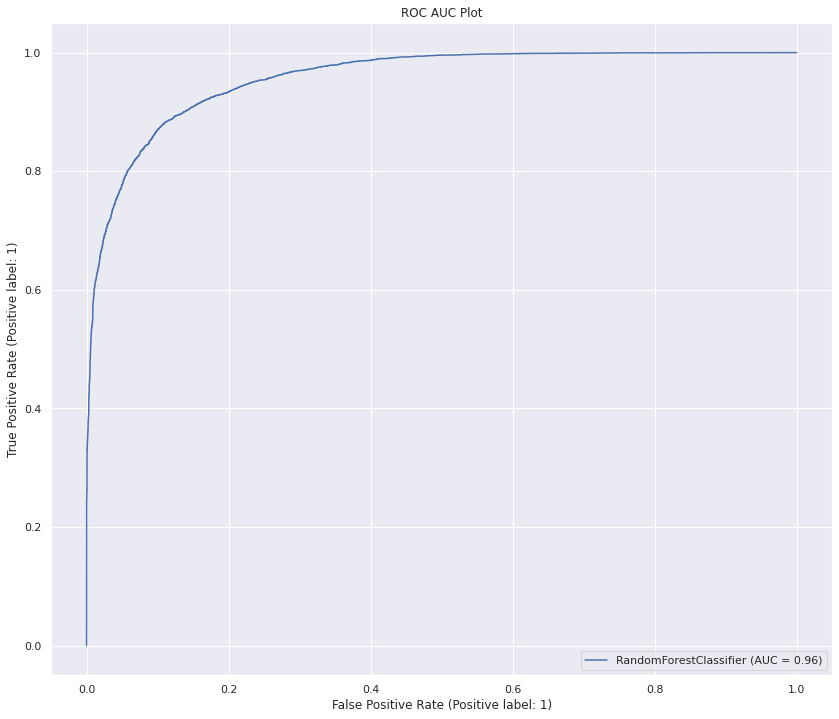

In [68]:
plot_roc_curve(random.best_estimator_,X_test,y_test)
plt.title('ROC AUC Plot')

# Model accuracy is 87.2 while AUC is 96%

## Saving the model:

In [71]:
import pickle
#Saving the model as .pkl file
import joblib
joblib.dump(random.best_estimator_,'Income_Prediction.pkl')

['Income_Prediction.pkl']

## Predictions:

In [72]:
# Loading the saved model
model=joblib.load('Income_Prediction.pkl')

#Prediction
prediction = model.predict(X_test)
prediction

array([0, 1, 1, ..., 1, 1, 0])

In [73]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,13818,13819,13820,13821,13822,13823,13824,13825,13826,13827
Predicted,0,1,1,1,0,0,0,0,0,0,...,0,1,1,0,1,1,0,1,1,0
Actual,0,1,0,1,0,0,1,0,0,0,...,0,1,1,0,1,1,0,1,1,0
